<a href="https://colab.research.google.com/github/Tshrestha-1114/Bank_Fraud_Detection_SQL/blob/main/KPMG_Tahsin_Clean_MERGE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Model for Hypothesis analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## HYPOTHESIS: Predict how likely a woman in NYC would be in the labor force based on her geographical location, socioeconomic status, education level, (and more)

In [ ]:
#Final  Hypothesis Question:
#predict how likely a woman in NYC would be in the labor force based on her geographical location, socioeconomic status, education level, (and more)

In [ ]:
import pandas as pd

# Load the dataset
df_data = pd.read_csv('/content/drive/MyDrive/KPMG_Data_files/KPMG #1 (NYC) - Realizing Gender Equality in the Workplace: Low Wage Geographies (Team B)/Data/TIDY_DATA/clean_data_merged2_pct.csv', header=0)

# Display the list of column names
print("Column Names:")
print(df_data.columns)



Column Names:
Index(['Unnamed: 0', 'ZIP_CODE', 'COUNTY_FIPS', 'UNEMPLOYMENT_RATE',
       'NOT_PUBLIC_TRANS_PCT', 'OTHER_TRANS_PCT', 'TAXI_TO_WORK_PCT',
       'WALK_TO_WORK_PCT', 'PUBLIC_TRANSP_TO_WORK_PCT', 'WORKED_FROM_HOME_PCT',
       'HH_IN_POVERTY', 'HH_INCOME', 'LOW_INC_PCT', 'LOW_MED_INC_PCT',
       'MED_INC_PCT', 'UPP_MED_INC_PCT', 'UPPER_INC_PCT', 'HH_POVERTY_PCT',
       'HH_Mod_Burden_PCT', 'HH_Sev_Burden_PCT', 'EMPLOYMENT_FEMALE_PCT',
       'BELOW_BACH_PCT_M', 'ABOVE_BACH_PCT_M', 'BELOW_BACH_PCT_F',
       'ABOVE_BACH_PCT_F'],
      dtype='object')


In [ ]:
# Drop columns with all values equal to 0
df_data_cleaned = df_data.loc[:, (df_data != 0).any(axis=0)]

# Print the shape of the cleaned dataset to see the number of rows and columns
print("Shape of the cleaned dataset:", df_data_cleaned.shape)

# Display the first few rows of the cleaned dataset
df_data_cleaned.head()

Shape of the cleaned dataset: (264, 25)


,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.45225,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.3588,0.074709,0.372605


In [ ]:
# Display the list of column names
print("Column Names:")
print(df_data_cleaned.columns)
df_data_cleaned.shape

Column Names:
Index(['Unnamed: 0', 'ZIP_CODE', 'COUNTY_FIPS', 'UNEMPLOYMENT_RATE',
       'NOT_PUBLIC_TRANS_PCT', 'OTHER_TRANS_PCT', 'TAXI_TO_WORK_PCT',
       'WALK_TO_WORK_PCT', 'PUBLIC_TRANSP_TO_WORK_PCT', 'WORKED_FROM_HOME_PCT',
       'HH_IN_POVERTY', 'HH_INCOME', 'LOW_INC_PCT', 'LOW_MED_INC_PCT',
       'MED_INC_PCT', 'UPP_MED_INC_PCT', 'UPPER_INC_PCT', 'HH_POVERTY_PCT',
       'HH_Mod_Burden_PCT', 'HH_Sev_Burden_PCT', 'EMPLOYMENT_FEMALE_PCT',
       'BELOW_BACH_PCT_M', 'ABOVE_BACH_PCT_M', 'BELOW_BACH_PCT_F',
       'ABOVE_BACH_PCT_F'],
      dtype='object')


(264, 25)

## DATASET without the null columns dropped

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_data = pd.read_csv('/content/drive/MyDrive/KPMG_Data_files/KPMG #1 (NYC) - Realizing Gender Equality in the Workplace: Low Wage Geographies (Team B)/Data/TIDY_DATA/clean_data_merged2_pct.csv', header=0)

# Display basic information about the dataset
print("Dataset Info:")
print(df_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 264 non-null    int64  
 1   ZIP_CODE                   264 non-null    int64  
 2   COUNTY_FIPS                264 non-null    int64  
 3   UNEMPLOYMENT_RATE          264 non-null    float64
 4   NOT_PUBLIC_TRANS_PCT       264 non-null    float64
 5   OTHER_TRANS_PCT            264 non-null    float64
 6   TAXI_TO_WORK_PCT           264 non-null    float64
 7   WALK_TO_WORK_PCT           264 non-null    float64
 8   PUBLIC_TRANSP_TO_WORK_PCT  264 non-null    float64
 9   WORKED_FROM_HOME_PCT       264 non-null    float64
 10  HH_IN_POVERTY              264 non-null    float64
 11  HH_INCOME                  264 non-null    float64
 12  LOW_INC_PCT                264 non-null    float64
 13  LOW_MED_INC_PCT            264 non-n

In [ ]:
import pandas as pd

# Load the dataset
df_data = pd.read_csv('/content/drive/MyDrive/KPMG_Data_files/KPMG #1 (NYC) - Realizing Gender Equality in the Workplace: Low Wage Geographies (Team B)/Data/TIDY_DATA/clean_data_merged2_pct.csv', header=0)

# Define a dictionary to map COUNTY_FIPS to NYC borough names
fips_to_borough = {
    36061: 'Manhattan',
    36047: 'Brooklyn',
    36081: 'Queens',
    36005: 'Bronx',
    36085: 'Staten Island'
}

# Create a new column 'BOROUGH' based on the mapping
df_data['BOROUGH'] = df_data['COUNTY_FIPS'].map(fips_to_borough)

# Display the dataset with the new 'BOROUGH' column
df_data.head(-1)


,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F,BOROUGH
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605,Manhattan
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605,Manhattan
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605,Manhattan
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605,Manhattan
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,11691,36081,0.102934,0.490794,0.008977,0.025250,0.065933,0.337688,0.071358,...,0.143195,0.247729,0.280155,0.256846,0.550351,0.187866,0.123858,0.237858,0.138435,Queens
259,259,11692,36081,0.088770,0.468406,0.014356,0.007335,0.038248,0.429739,0.041916,...,0.131425,0.184070,0.295502,0.236288,0.537072,0.193276,0.100044,0.210118,0.163124,Queens
260,260,11693,36081,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,...,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698,Queens
261,261,11695,36081,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,...,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698,Queens


# Drop the columns that we don't need

In [ ]:
## whether an individual is in the labor force or not.
#we need this data for answering the the hypothesis question :  predict the labor force participation of women in impoverished areas based on a combination of socioeconomic factors, demographic characteristics, and health-related variables

#regression model: stack regression, lineear regresssion, prediction data

#If the intended output variable is continuous data (regression) - Total Female employees (of age …) from this Zip code.

#1. Split the data into train and test data
#2. Use grid search on these ML models individually to train the ML model using train data and get the optimal models for each ML Model type
#a. Linear regression -
#b. Random Forest Regression -
#c. XGBoost regression -
#d. Gradient booster regression -

#3. Now, use the all the above optimal ML models from above and put them into Stacking Regression model and train ML model using train data.

#4. Use the trained stacking regression model  and use test data and give predictions

#5. Now use those predictions (total females work approx) and Zip code from test data and plot a heat map over the NYC map.

# Exploratory data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(df_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 264 non-null    int64  
 1   ZIP_CODE                   264 non-null    int64  
 2   COUNTY_FIPS                264 non-null    int64  
 3   UNEMPLOYMENT_RATE          264 non-null    float64
 4   NOT_PUBLIC_TRANS_PCT       264 non-null    float64
 5   OTHER_TRANS_PCT            264 non-null    float64
 6   TAXI_TO_WORK_PCT           264 non-null    float64
 7   WALK_TO_WORK_PCT           264 non-null    float64
 8   PUBLIC_TRANSP_TO_WORK_PCT  264 non-null    float64
 9   WORKED_FROM_HOME_PCT       264 non-null    float64
 10  HH_IN_POVERTY              264 non-null    float64
 11  HH_INCOME                  264 non-null    float64
 12  LOW_INC_PCT                264 non-null    float64
 13  LOW_MED_INC_PCT            264 non-n

In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df_data.describe())



Summary Statistics:
       Unnamed: 0      ZIP_CODE   COUNTY_FIPS  UNEMPLOYMENT_RATE  \
count  264.000000    264.000000    264.000000         264.000000   
mean   131.500000  10686.496212  36059.613636           0.064676   
std     76.354437    581.580258     21.554828           0.029903   
min      0.000000  10001.000000  36005.000000           0.011620   
25%     65.750000  10125.750000  36047.000000           0.046116   
50%    131.500000  10459.500000  36061.000000           0.060621   
75%    197.250000  11243.500000  36081.000000           0.077027   
max    263.000000  11697.000000  36085.000000           0.190873   

       NOT_PUBLIC_TRANS_PCT  OTHER_TRANS_PCT  TAXI_TO_WORK_PCT  \
count            264.000000       264.000000        264.000000   
mean               0.245495         0.008999          0.015414   
std                0.198646         0.005630          0.017881   
min                0.026468         0.000000          0.000000   
25%                0.087055         

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df_data.isnull().sum())


Missing Values:
Unnamed: 0                   0
ZIP_CODE                     0
COUNTY_FIPS                  0
UNEMPLOYMENT_RATE            0
NOT_PUBLIC_TRANS_PCT         0
OTHER_TRANS_PCT              0
TAXI_TO_WORK_PCT             0
WALK_TO_WORK_PCT             0
PUBLIC_TRANSP_TO_WORK_PCT    0
WORKED_FROM_HOME_PCT         0
HH_IN_POVERTY                0
HH_INCOME                    0
LOW_INC_PCT                  0
LOW_MED_INC_PCT              0
MED_INC_PCT                  0
UPP_MED_INC_PCT              0
UPPER_INC_PCT                0
HH_POVERTY_PCT               0
HH_Mod_Burden_PCT            0
HH_Sev_Burden_PCT            0
EMPLOYMENT_FEMALE_PCT        0
BELOW_BACH_PCT_M             0
ABOVE_BACH_PCT_M             0
BELOW_BACH_PCT_F             0
ABOVE_BACH_PCT_F             0
BOROUGH                      0
dtype: int64


## Explore the distribution of the target variable using a histogram

Searching for categorical value

In [ ]:
# Select columns of type 'object' (categorical)
categorical_columns = df_data.select_dtypes(include=['object']).columns

# Display the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['BOROUGH'], dtype='object')


Searching for missing values

In [ ]:
# Impute missing values with the mean
df_missing=df_data.fillna(df_data.mean(), inplace=True)
print(df_missing)

None


<ipython-input-158-030da80b76b5>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_missing=df_data.fillna(df_data.mean(), inplace=True)


Standardization (Z-score normalization):



In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = df_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_data[numerical_features] = scaler.fit_transform(df_data[numerical_features])
print(df_data.head())
print(df_data.shape)

   Unnamed: 0  ZIP_CODE  COUNTY_FIPS  UNEMPLOYMENT_RATE  NOT_PUBLIC_TRANS_PCT  \
0   -1.725502 -1.180917      0.06444          -0.795043             -0.911863   
1   -1.712381 -0.979359      0.06444          -0.795043             -0.911863   
2   -1.699259 -0.975914      0.06444          -0.795043             -0.911863   
3   -1.686137 -0.972468      0.06444          -0.795043             -0.911863   
4   -1.673016 -0.970746      0.06444          -0.795043             -0.911863   

   OTHER_TRANS_PCT  TAXI_TO_WORK_PCT  WALK_TO_WORK_PCT  \
0         0.076718          0.052683           1.19095   
1         0.076718          0.052683           1.19095   
2         0.076718          0.052683           1.19095   
3         0.076718          0.052683           1.19095   
4         0.076718          0.052683           1.19095   

   PUBLIC_TRANSP_TO_WORK_PCT  WORKED_FROM_HOME_PCT  ...  UPPER_INC_PCT  \
0                  -0.062442              0.844838  ...       0.220752   
1               

Feature Engineering

In [ ]:
df_data.head(-1)

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F,BOROUGH
0,-1.725502,-1.180917,0.064440,-0.795043,-0.911863,0.076718,0.052683,1.190950,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.929860,0.805559,-0.786668,0.758900,Manhattan
1,-1.712381,-0.979359,0.064440,-0.795043,-0.911863,0.076718,0.052683,1.190950,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.929860,0.805559,-0.786668,0.758900,Manhattan
2,-1.699259,-0.975914,0.064440,-0.795043,-0.911863,0.076718,0.052683,1.190950,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.929860,0.805559,-0.786668,0.758900,Manhattan
3,-1.686137,-0.972468,0.064440,-0.795043,-0.911863,0.076718,0.052683,1.190950,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.929860,0.805559,-0.786668,0.758900,Manhattan
4,-1.673016,-0.970746,0.064440,-0.795043,-0.911863,0.076718,0.052683,1.190950,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.929860,0.805559,-0.786668,0.758900,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,1.659894,1.730478,0.994069,1.281828,1.237202,-0.003997,0.551148,-0.675828,-0.969208,-0.899467,...,-0.909354,1.395876,1.496305,0.291711,0.929299,0.890585,-0.970008,1.305091,-1.107823,Queens
259,1.673016,1.732200,0.994069,0.807272,1.124287,0.953221,-0.452684,-0.921375,-0.240619,-1.368494,...,-0.971595,0.625255,1.885211,-0.015828,0.486220,0.965540,-1.149983,0.949429,-0.911015,Queens
260,1.686137,1.733923,0.994069,0.973941,1.660945,0.309552,-0.863698,-1.116928,-1.081953,-0.844487,...,-0.796463,0.193137,-0.352476,0.166860,2.053436,0.486379,-0.857515,1.131432,-0.571629,Queens
261,1.699259,1.737369,0.994069,0.973941,1.660945,0.309552,-0.863698,-1.116928,-1.081953,-0.844487,...,-0.796463,0.193137,-0.352476,0.166860,2.053436,0.486379,-0.857515,1.131432,-0.571629,Queens


In [ ]:
df_data.shape

(264, 26)

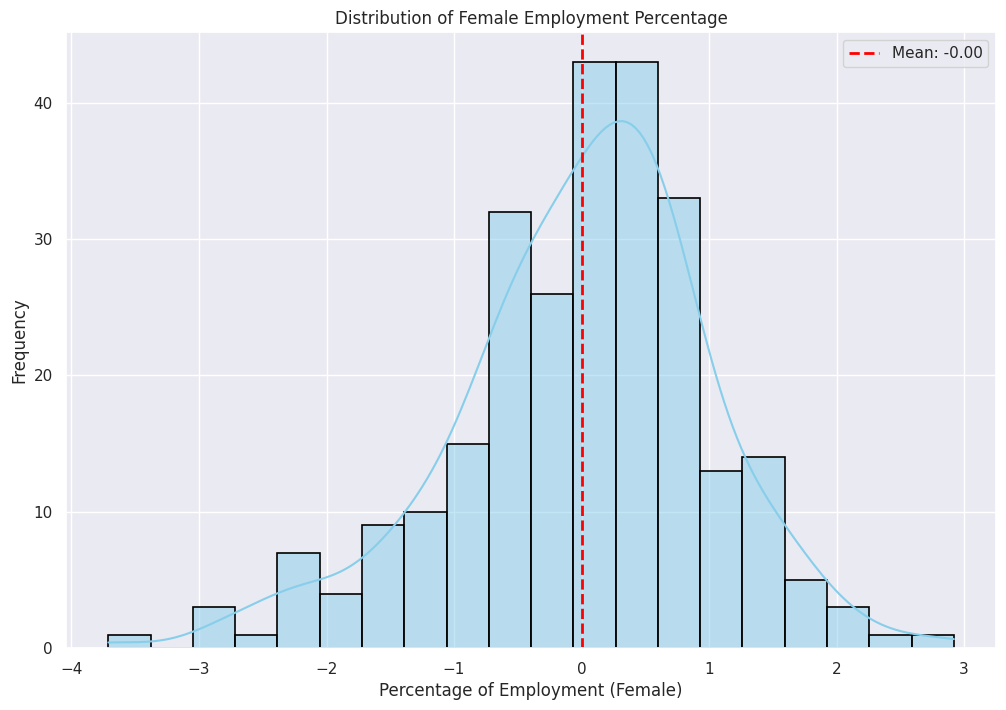

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark background style for better visibility of colors
sns.set(style="darkgrid")

# Explore the distribution of the target variable using a histogram with KDE
plt.figure(figsize=(12, 8))
sns.histplot(df_data['EMPLOYMENT_FEMALE_PCT'], bins=20, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

# Enhance the plot with additional details
plt.title('Distribution of Female Employment Percentage')
plt.xlabel('Percentage of Employment (Female)')
plt.ylabel('Frequency')

# Add a vertical line for the mean
mean_value = df_data['EMPLOYMENT_FEMALE_PCT'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()


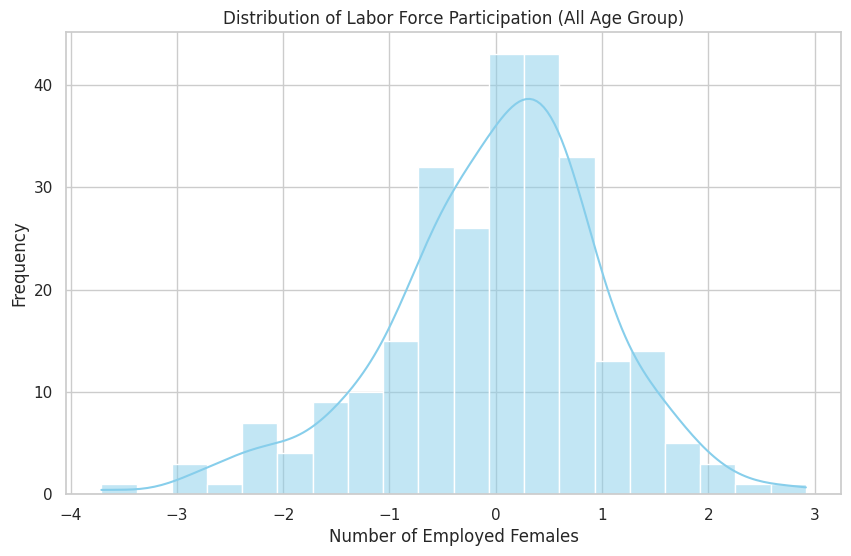

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Explore the distribution of the target variable using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_data['EMPLOYMENT_FEMALE_PCT'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Labor Force Participation (All Age Group)')
plt.xlabel('Number of Employed Females')
plt.ylabel('Frequency')
plt.show()

## Explore the correlation between features and the target variable using a heatmap

In [ ]:
## check for more correlation features more
## create the slides for the final presentation
##

In [ ]:
df_data.head()

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F,BOROUGH
0,-1.725502,-1.180917,0.06444,-0.795043,-0.911863,0.076718,0.052683,1.19095,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.92986,0.805559,-0.786668,0.7589,Manhattan
1,-1.712381,-0.979359,0.06444,-0.795043,-0.911863,0.076718,0.052683,1.19095,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.92986,0.805559,-0.786668,0.7589,Manhattan
2,-1.699259,-0.975914,0.06444,-0.795043,-0.911863,0.076718,0.052683,1.19095,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.92986,0.805559,-0.786668,0.7589,Manhattan
3,-1.686137,-0.972468,0.06444,-0.795043,-0.911863,0.076718,0.052683,1.19095,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.92986,0.805559,-0.786668,0.7589,Manhattan
4,-1.673016,-0.970746,0.06444,-0.795043,-0.911863,0.076718,0.052683,1.19095,-0.062442,0.844838,...,0.220752,-0.153527,0.110838,-1.115545,0.492794,-0.92986,0.805559,-0.786668,0.7589,Manhattan


In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                           Unnamed: 0  ZIP_CODE  COUNTY_FIPS  \
Unnamed: 0                   1.000000  0.926226     0.195083   
ZIP_CODE                     0.926226  1.000000     0.244041   
COUNTY_FIPS                  0.195083  0.244041     1.000000   
UNEMPLOYMENT_RATE            0.377570  0.240187    -0.355850   
NOT_PUBLIC_TRANS_PCT         0.688257  0.575275     0.280330   
OTHER_TRANS_PCT             -0.085811 -0.160095    -0.047177   
TAXI_TO_WORK_PCT            -0.365645 -0.412412    -0.063899   
WALK_TO_WORK_PCT            -0.759304 -0.665073    -0.051790   
PUBLIC_TRANSP_TO_WORK_PCT   -0.032047  0.004696    -0.394518   
WORKED_FROM_HOME_PCT        -0.633909 -0.500313     0.024024   
HH_IN_POVERTY                0.154072  0.114745    -0.505886   
HH_INCOME                   -0.547842 -0.415496     0.265316   
LOW_INC_PCT                  0.263064  0.141595    -0.455871   
LOW_MED_INC_PCT              0.600071  0.492776    -0.211172   
MED_INC_PCT                  0.680113  0

<ipython-input-166-3490acf1dd3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_data.corr()


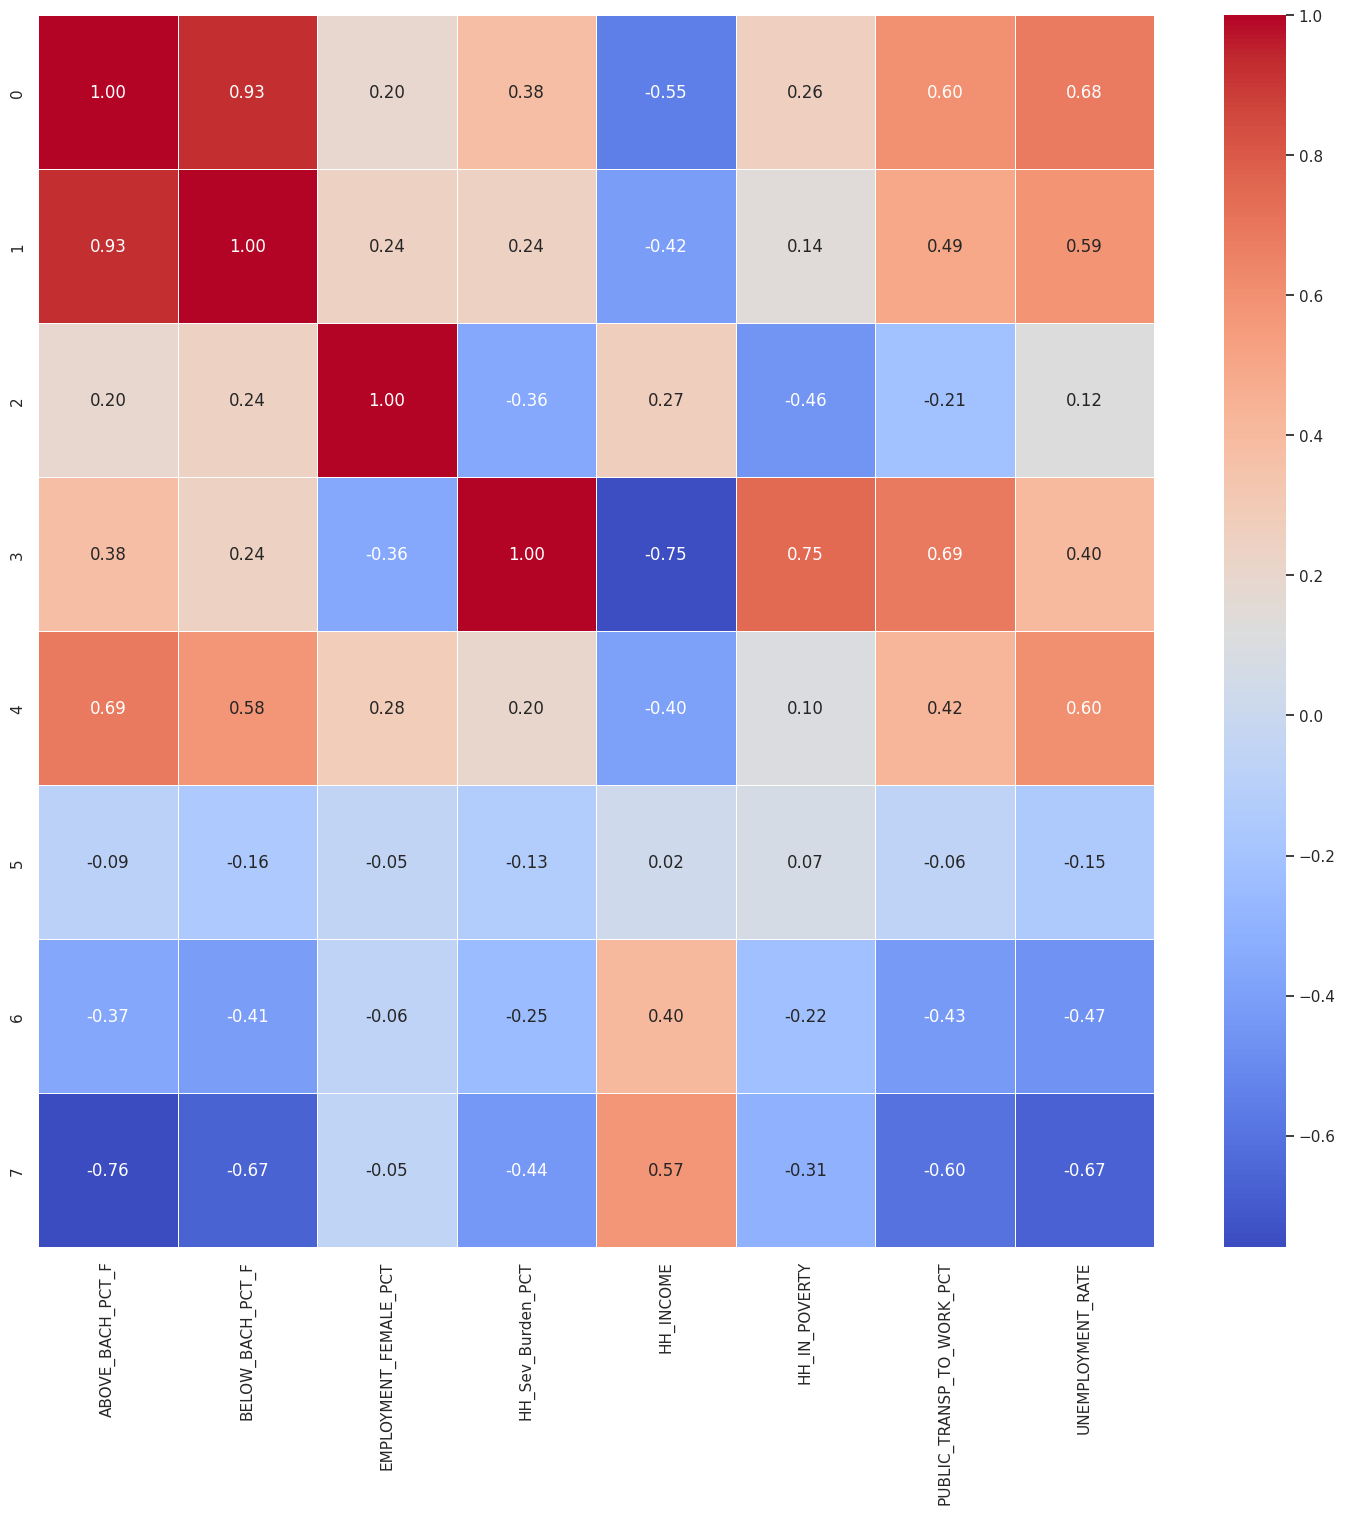

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your correlation matrix data
correlation_data = {
    'ABOVE_BACH_PCT_F': [1.000000, 0.926226, 0.195083, 0.377570, 0.688257, -0.085811, -0.365645, -0.759304],
    'BELOW_BACH_PCT_F': [0.926226, 1.000000, 0.244041, 0.240187, 0.575275, -0.160095, -0.412412, -0.665073],
    'EMPLOYMENT_FEMALE_PCT': [0.195083, 0.244041, 1.000000, -0.355850, 0.280330, -0.047177, -0.063899, -0.051790],
    'HH_Sev_Burden_PCT': [0.377570, 0.240187, -0.355850, 1.000000, 0.202439, -0.133142, -0.247381, -0.440504],
    'HH_INCOME': [-0.547842, -0.415496, 0.265316, -0.749263, -0.396204, 0.024269, 0.404449, 0.574479],
    'HH_IN_POVERTY': [0.263064, 0.141595, -0.455871, 0.751071, 0.101907, 0.072048, -0.222871, -0.311937],
    'PUBLIC_TRANSP_TO_WORK_PCT': [0.600071, 0.492776, -0.211172, 0.686598, 0.424635, -0.064878, -0.428588, -0.601782],
    'UNEMPLOYMENT_RATE': [0.680113, 0.586959, 0.123826, 0.400250, 0.604895, -0.151756, -0.469269, -0.672211],
}

# Your column names
columns = ["ABOVE_BACH_PCT_F", "BELOW_BACH_PCT_F", "EMPLOYMENT_FEMALE_PCT", "HH_Sev_Burden_PCT",
           "HH_INCOME", "HH_IN_POVERTY", "PUBLIC_TRANSP_TO_WORK_PCT", "UNEMPLOYMENT_RATE"]

# Create a DataFrame from the correlation matrix
df_data = pd.DataFrame(correlation_data, columns=columns)

# Set up the matplotlib figure
plt.figure(figsize=(18, 16))

# Create a heatmap with Seaborn
sns.heatmap(df_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()








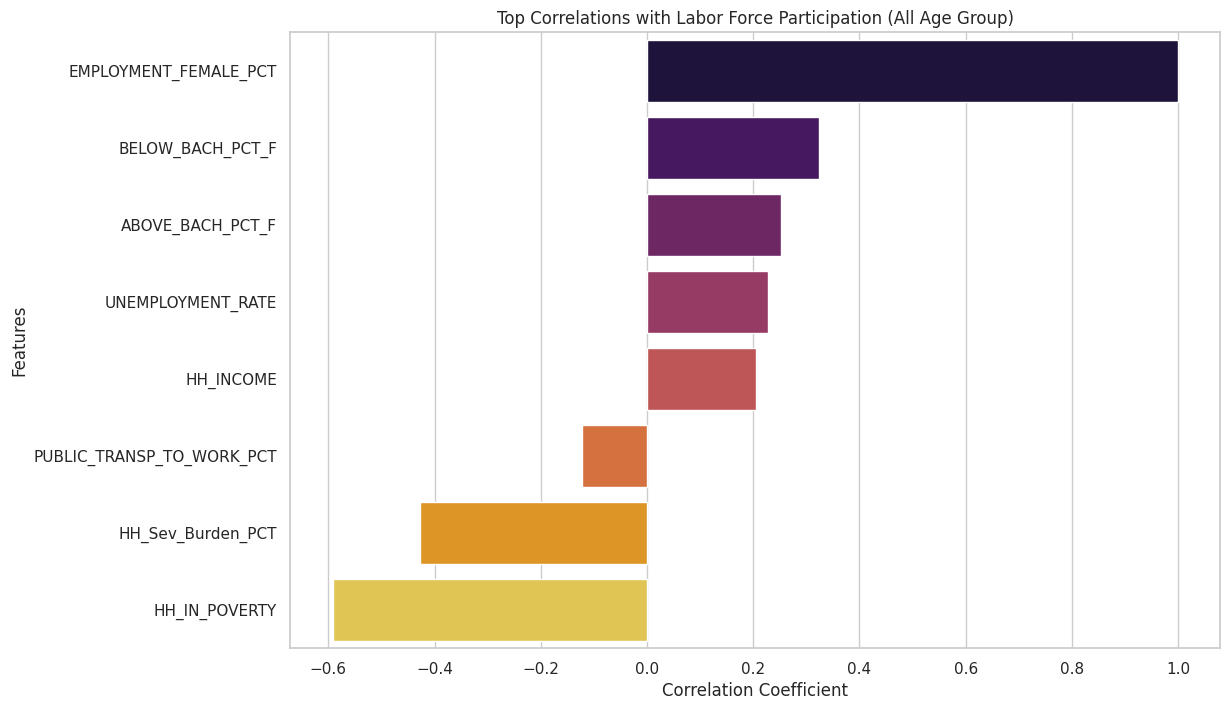

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_data.corr()

# Select the top correlated features with the target variable
top_correlations = correlation_matrix[['EMPLOYMENT_FEMALE_PCT']].sort_values(by='EMPLOYMENT_FEMALE_PCT', ascending=False).head(10)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the top correlations using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlations['EMPLOYMENT_FEMALE_PCT'], y=top_correlations.index, palette='inferno')
plt.title('Top Correlations with Labor Force Participation (All Age Group)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()




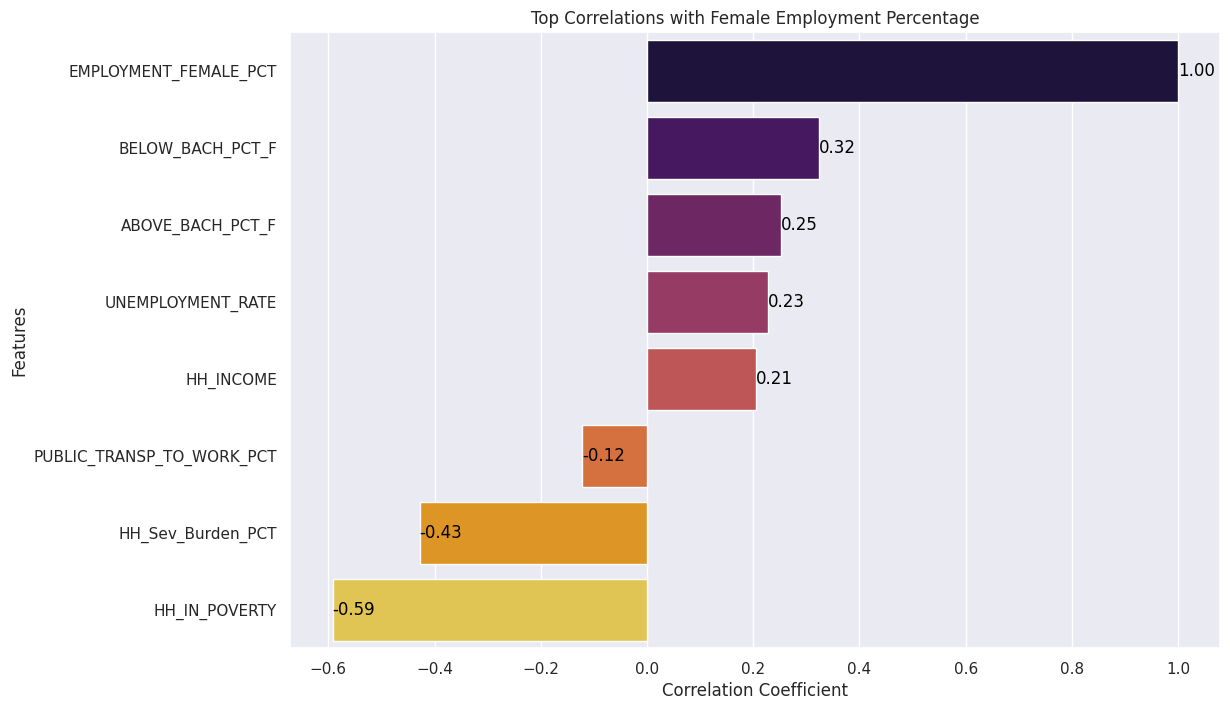

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_data.corr()

# Select the top correlated features with the target variable
top_correlations = correlation_matrix[['EMPLOYMENT_FEMALE_PCT']].sort_values(by='EMPLOYMENT_FEMALE_PCT', ascending=False).head(10)

# Set a dark background style for better visibility of colors
sns.set(style="darkgrid")

# Plotting the top correlations using a horizontal bar plot with inferno color palette
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_correlations['EMPLOYMENT_FEMALE_PCT'], y=top_correlations.index, palette='inferno')

# Enhance the plot with additional details
plt.title('Top Correlations with Female Employment Percentage')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Add data labels
for index, value in enumerate(top_correlations['EMPLOYMENT_FEMALE_PCT']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

# Show the plot
plt.show()


In [ ]:
# gis file for mapping on heatmaps
# take a look at what's hugging face




## Linear Regression

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/KPMG_Data_files/KPMG #1 (NYC) - Realizing Gender Equality in the Workplace: Low Wage Geographies (Team B)/Data/TIDY_DATA/clean_data_merged2_pct.csv', header=0)

In [ ]:
df_data.head(-1)

,Unnamed: 0,ZIP_CODE,COUNTY_FIPS,UNEMPLOYMENT_RATE,NOT_PUBLIC_TRANS_PCT,OTHER_TRANS_PCT,TAXI_TO_WORK_PCT,WALK_TO_WORK_PCT,PUBLIC_TRANSP_TO_WORK_PCT,WORKED_FROM_HOME_PCT,...,UPP_MED_INC_PCT,UPPER_INC_PCT,HH_POVERTY_PCT,HH_Mod_Burden_PCT,HH_Sev_Burden_PCT,EMPLOYMENT_FEMALE_PCT,BELOW_BACH_PCT_M,ABOVE_BACH_PCT_M,BELOW_BACH_PCT_F,ABOVE_BACH_PCT_F
0,0,10001,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
1,1,10118,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
2,2,10120,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
3,3,10122,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
4,4,10123,36061,0.040947,0.064701,0.009431,0.016354,0.276412,0.452250,0.180852,...,0.149303,0.356898,0.119737,0.225484,0.162775,0.537269,0.056489,0.358800,0.074709,0.372605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,11691,36081,0.102934,0.490794,0.008977,0.025250,0.065933,0.337688,0.071358,...,0.151910,0.143195,0.247729,0.280155,0.256846,0.550351,0.187866,0.123858,0.237858,0.138435
259,259,11692,36081,0.088770,0.468406,0.014356,0.007335,0.038248,0.429739,0.041916,...,0.140884,0.131425,0.184070,0.295502,0.236288,0.537072,0.193276,0.100044,0.210118,0.163124
260,260,11693,36081,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,...,0.169869,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698
261,261,11695,36081,0.093745,0.574809,0.010739,0.000000,0.016199,0.323444,0.074809,...,0.169869,0.164543,0.148374,0.207201,0.248500,0.584039,0.158696,0.138743,0.224313,0.205698


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:

#Since this BOROUGH column is in object type and not in float type we get error in modeling. So, for training I am removing the column
#columns_to_drop = ['BOROUGH']
#df_data = df_data.drop(columns=columns_to_drop)

In [ ]:


# Assuming df_data is your DataFrame
# Select features and target variable
y = df_data['EMPLOYMENT_FEMALE_PCT']
X = df_data.drop(columns ='EMPLOYMENT_FEMALE_PCT', axis=1) # Exclude the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Display model coefficients and performance metrics
print('Model Coefficients:')
for feature, coefficient in zip(X.columns, linear_reg_model.coef_):
    print(f'{feature}: {coefficient:.4f}')

print('\nIntercept:', linear_reg_model.intercept_)
print('\nMean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)

Model Coefficients:
Unnamed: 0: -0.0039
ZIP_CODE: 0.0006
COUNTY_FIPS: -0.0007
UNEMPLOYMENT_RATE: 0.0038
NOT_PUBLIC_TRANS_PCT: -446609.8354
OTHER_TRANS_PCT: -10756.9043
TAXI_TO_WORK_PCT: -36099.5832
WALK_TO_WORK_PCT: -242551.5697
PUBLIC_TRANSP_TO_WORK_PCT: -293479.2676
WORKED_FROM_HOME_PCT: -139674.4883
HH_IN_POVERTY: -0.0005
HH_INCOME: -0.0482
LOW_INC_PCT: -0.0227
LOW_MED_INC_PCT: -0.0054
MED_INC_PCT: -0.0118
UPP_MED_INC_PCT: 0.0025
UPPER_INC_PCT: 0.0098
HH_POVERTY_PCT: 0.0017
HH_Mod_Burden_PCT: -0.0006
HH_Sev_Burden_PCT: 0.0024
BELOW_BACH_PCT_M: -0.0539
ABOVE_BACH_PCT_M: -0.0691
BELOW_BACH_PCT_F: 0.0516
ABOVE_BACH_PCT_F: 0.0707

Intercept: 0.5239067575062163

Mean Absolute Error (MAE): 0.00976305680420726
Mean Squared Error (MSE): 0.00018850073152813595


Positive Influencers:

TRANSP_CAR_TO_WORK
TRANSP_BICYCLE_TO_WORK
TRANSP_TAXI_TO_WORK
TRANSP_WORKED_FROM_HOME
PUBLIC_TRANSP_TO_WORK_PCT

Negative Influencers:

UNEMPLOYMENT_RATE
TRANSP_PUBLIC_TO_WORK
TRANSP_OTHER_TO_WORK
TRANSP_WALKED_TO_WORK
WORKED_FROM_HOME_PCT
HH_IN_POVERTY
HH_INCOME
LOW_INC_PCT
LOW_MED_INC_PCT
MED_INC_PCT
UPP_MED_INC_PCT
UPPER_INC_PCT
HH_POVERTY_PCT
HH_Mod_Burden_PCT
HH_Sev_Burden_PCT
EMPLOYMENT_MALE_PCT (strong negative influence)

Features with No Influence:

Unnamed: 0
ZIP_CODE
COUNTY_FIPS
TRANSP_MOTORCYCLE_TO_WORK
BELOW_BACH_PCT_M
ABOVE_BACH_PCT_M
BELOW_BACH_PCT_F
ABOVE_BACH_PCT_F




Interpretation:
The model seems to be performing extremely well on the training data, as indicated by the very low MAE and MSE values.

Employment of females is negatively influenced by factors such as unemployment rate, public transportation to work, poverty, and male employment percentage.

Features related to car commuting, biking to work, taking a taxi, working from home, and public transportation positively influence female employment.

## Visualizing the model

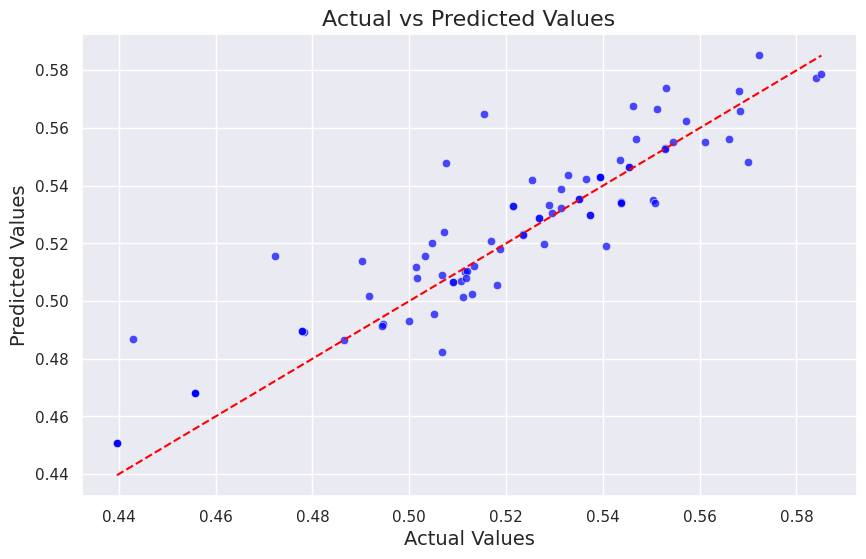

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', alpha=0.7)

# Diagonal line showing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Title and labels
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Show the plot
plt.show()

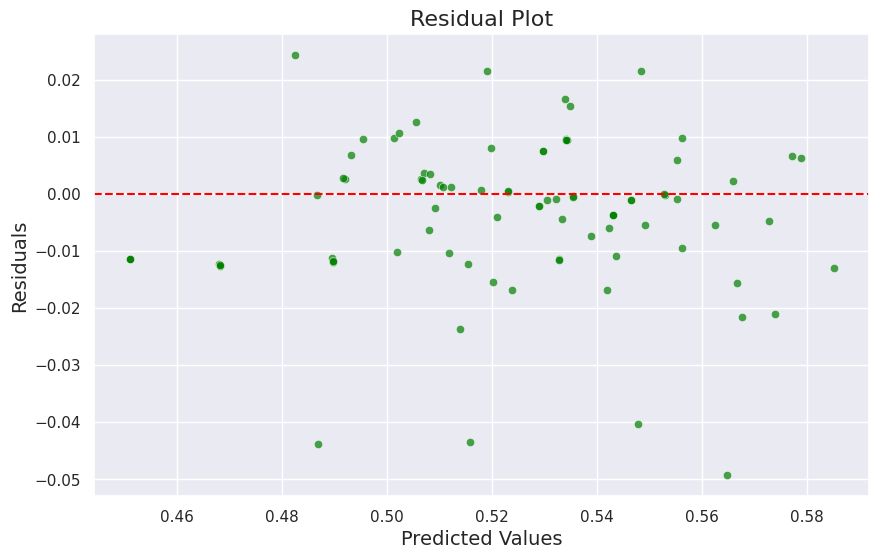

In [ ]:
# Calculate residuals
residuals = y_test - predictions

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, color='green', alpha=0.7)

# Horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Title and labels
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

# Show the plot
plt.show()

## Error check

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test contains the actual values and predictions contains the predicted values
r2 = r2_score(y_test, predictions)

# Display the R-squared value
print(f'R-squared: {r2:.2f}')








R-squared: 0.83


In [ ]:
import numpy as np

# Assuming y_test is the actual values and predictions is the predicted values
actual_values = y_test
predicted_values = predictions

# Calculate absolute percentage differences
absolute_percentage_diff = np.abs((actual_values - predicted_values) / actual_values)

# Calculate MAPE
mape = np.mean(absolute_percentage_diff) * 100

# Display MAPE
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 1.92%


## Ridge regression model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer

# Assuming df_data is your DataFrame with the relevant features and target variable

# Select features and target variable
y = df_data['EMPLOYMENT_FEMALE_PCT']
X = df_data.drop(columns=['EMPLOYMENT_FEMALE_PCT'])  # Drop the target variable and non-numeric columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Ridge model object
ridge_model = Ridge()

# Define a range of alpha values for hyperparameter tuning
alphas = np.logspace(-6, 6, 13)

# Create a parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Define a custom scorer for cross-validation based on MAPE
def custom_scorer(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mape_scorer = make_scorer(custom_scorer, greater_is_better=False)

# Create GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring=mape_scorer)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter values
best_alpha = grid_search.best_params_['alpha']

# Train the final model with the best hyperparameter on the entire training set
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)

# Make predictions on the normalized test data
predictions = final_model.predict(X_test_scaled)

# Display model summary
print('Model Summary')
for feature, weight in zip(X.columns, final_model.coef_):
    print(f'{feature}: {weight}')

# Display intercept
print('\nIntercept:', final_model.intercept_)

# Display performance metrics
mape = mean_absolute_error(y_test, predictions)
print(f'\nMean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


Model Summary
Unnamed: 0: -0.0035279119887934854
ZIP_CODE: 0.0005903963433277238
COUNTY_FIPS: -0.0009520156990634496
UNEMPLOYMENT_RATE: 0.003792431221838576
NOT_PUBLIC_TRANS_PCT: -0.0019147072394542202
OTHER_TRANS_PCT: -0.00010718476293578402
TAXI_TO_WORK_PCT: -0.0005007402140782394
WALK_TO_WORK_PCT: 0.004080230428635985
PUBLIC_TRANSP_TO_WORK_PCT: 0.0018379856475105706
WORKED_FROM_HOME_PCT: -0.004687480283710842
HH_IN_POVERTY: -0.0008849543920448348
HH_INCOME: -0.01215882822137047
LOW_INC_PCT: -0.004142148101363181
LOW_MED_INC_PCT: 0.001048581178866499
MED_INC_PCT: -0.0039006686747014535
UPP_MED_INC_PCT: 0.004231168320398255
UPPER_INC_PCT: 0.00272368477036877
HH_POVERTY_PCT: 0.0029625109024827333
HH_Mod_Burden_PCT: -0.0005505095158519214
HH_Sev_Burden_PCT: 0.00249222306173293
BELOW_BACH_PCT_M: -0.05208377207300015
ABOVE_BACH_PCT_M: -0.0669644495556212
BELOW_BACH_PCT_F: 0.050690748120209864
ABOVE_BACH_PCT_F: 0.06999644952052028

Intercept: 0.5239067575710916

Mean Absolute Percentage Er

Household Characteristics:
Positive Influencers:
HOUSEHOLDS, HH_INCOME, HH_RENTED_PCT: These features have positive coefficients, suggesting that higher numbers of households, higher household income, and a higher percentage of rented households positively influence the target variable (EMPLOYMENT_FEMALE_POP).
Educational Factors:
Positive Influencers:
EDUC_HS, EDUC_ASSOC, EDUC_FEMALE_HIGH_SCHOOL: Higher coefficients for these educational factors imply a positive association between higher levels of education, especially high school and associate degrees, and higher female employment.
Transportation and Commuting:
Positive Influencers:
TRANSP_WORKED_FROM_HOME, TRANSP_WALKED_TO_WORK: Positive coefficients indicate that a higher percentage of people working from home and those walking to work are associated with increased female employment.
Gender Ratios:
Negative Influencers:
FEMALE, EDUC_FEMALE_POP, EMPLOYMENT_FEMALE_PCT: Negative coefficients suggest that a higher proportion of females in the population, higher female education levels, and a higher percentage of female employment may be associated with lower female employment.
Income Levels:
Negative Influencers:
HH_OVER_200K, ABOVE_BACH_PCT_F: Negative coefficients imply a potential negative relationship between higher income levels (above $200K) and a higher percentage of the female population with a bachelor's degree or higher, and female employment.



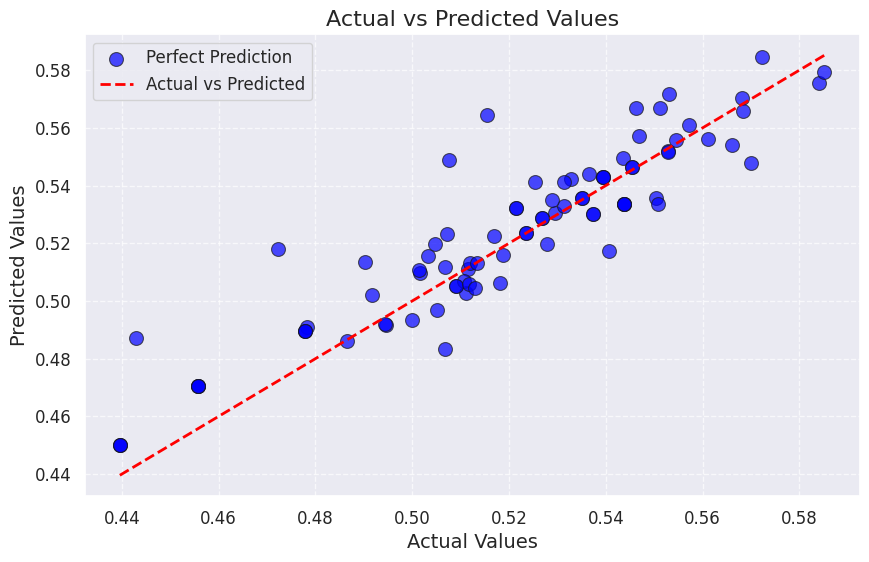

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', alpha=0.7, edgecolor='k', s=100)

# Diagonal line showing perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Title and labels
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)

# Set the x and y axis labels with larger font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(['Perfect Prediction', 'Actual vs Predicted'], loc='upper left', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the scatter plot
plt.show()




In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Create the GradientBoostingRegressor model object with early stopping
gb_model_early_stopping = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=1234, validation_fraction=0.2, n_iter_no_change=10, tol=0.01)

# Fit the model to the training data with early stopping
gb_model_early_stopping.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = gb_model_early_stopping.predict(X_val)

# Calculate the validation MSE
val_mse = mean_squared_error(y_val, val_predictions)

# Display the validation MSE
print(f"Validation MSE: {val_mse:.4f}")

Validation MSE: 0.0003


In [ ]:

#remove the features for training instead of training with all the features
# use the total population instead of total employed pop

#HH_RENTED: 1.2462350286909432e-06
#HH_RATIO: 1.2462397802446654e-06 remove these columns if they are not useful depending on the census data analysis
# model is too good
# what do i learn from this model
# what ways we can combine the features
#1) will have impact on outcome variable without predidcting perfectly
#2) realizing the relationship
#3) input feature can change as a society?


## Random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming df_data is your DataFrame
# Select features and target variable
y = df_data['EMPLOYMENT_FEMALE_PCT']
X = df_data.drop(columns='EMPLOYMENT_FEMALE_PCT', axis=1)  # Exclude the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=1234)  # You can adjust the number of trees (n_estimators) as needed

# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Display feature importances and performance metrics
print('Feature Importances:')
for feature, importance in zip(X.columns, random_forest_model.feature_importances_):
    print(f'{feature}: {importance:.4f}')

print('\nMean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)


Feature Importances:
Unnamed: 0: 0.0246
ZIP_CODE: 0.0157
COUNTY_FIPS: 0.0163
UNEMPLOYMENT_RATE: 0.0392
NOT_PUBLIC_TRANS_PCT: 0.0152
OTHER_TRANS_PCT: 0.0924
TAXI_TO_WORK_PCT: 0.0656
WALK_TO_WORK_PCT: 0.0302
PUBLIC_TRANSP_TO_WORK_PCT: 0.0227
WORKED_FROM_HOME_PCT: 0.0196
HH_IN_POVERTY: 0.0283
HH_INCOME: 0.0294
LOW_INC_PCT: 0.0673
LOW_MED_INC_PCT: 0.0285
MED_INC_PCT: 0.1834
UPP_MED_INC_PCT: 0.0571
UPPER_INC_PCT: 0.0222
HH_POVERTY_PCT: 0.0217
HH_Mod_Burden_PCT: 0.0176
HH_Sev_Burden_PCT: 0.0189
BELOW_BACH_PCT_M: 0.0730
ABOVE_BACH_PCT_M: 0.0391
BELOW_BACH_PCT_F: 0.0298
ABOVE_BACH_PCT_F: 0.0424

Mean Absolute Error (MAE): 0.017370960336152753
Mean Squared Error (MSE): 0.0007315694992686827


Highly Important Features:

'FEMALE,' 'EMPLOYMENT_POP,' and 'POP_EDUC' appear to be highly influential, with importance values of 0.3942, 0.1368, and 0.0256, respectively.


Non-Zero Features:
Features with importance values of 0 (e.g., 'ZIP_CODE,' 'COUNTY_FIPS,' 'HH_INCOME,' 'UNEMPLOYMENT_RATE') are considered less influential in the model.

In [ ]:
#partial dependence plots
# draw decision tree


Decision Tree